# Deep Learning I
Actividad Lección 13 || Programación Python para Machine Learning

Objetivos:
* Saber qué es el Deep Learning y en qué situaciones puede ser útil.
* Identificar los requisitos software y hardware para desarrollar proyectos de Deep Learning.
* Conocer los distintos modelos de Deep Learning existentes.
* Dominar las técnicas de implementación de modelos de Deep Learning en Python.

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 17/01/2023

# Tabla de Contenidos
1. [Importes](#importes)
2. [Instalaciones](#instalaciones)
3. [Carga de datos](#carga-de-datos)
4. [Red Neuronal Profunda](#dnn)
5. [Conclusión](#conclusion)

# Importes <a class="anchor" id="importes"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random, time
from matplotlib import ticker
from sklearn.preprocessing import StandardScaler

# Instalaciones <a class="anchor" id="instalaciones"></a>
Actualmente, desde la versión 2.0.0 de TensorFlow incluye Keras como API de alto nivel para la construcción de modelos de Deep Learning. Por tanto, no es necesario instalar Keras por separado.

In [2]:
#!pip install tensorflow
#!pip install keras

In [3]:
import tensorflow as tf
import keras #from tensorflow import keras

print(f"Versión Tensorflow: {tf.__version__}")
print(f"Versión Keras: {keras.__version__}")
print("Num GPUs Disponibles: ", len(tf.config.list_physical_devices('GPU')))

Versión Tensorflow: 2.11.0
Versión Keras: 2.11.0
Num GPUs Disponibles:  0


Al no disponer de GPUs, no es posible utilizar Tensorflow con GPUs

# Carga de datos <a class="anchor" id="carga-de-datos"></a>
Se cargarán los datos del dataset MNIST incluidos en la propia librería de Keras para trabajar con un modelo de Red Neuronal Profunda.

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Es necesario realizar un preprocesamiento de los datos para que el modelo pueda trabajar con ellos. Los cambios que se realizarán son:
* Obtención del número de clases (Valores únicos en y_train)
* Tamaño del input = Tamaño de las imágenes (28x28)
* Reajustar el tamaño de los datos independientes en una matriz de 1x784
* Normalización de los datos independientes
* Conversión de los datos dependientes a variables categóricas

In [5]:
# Obtención del número de clases (Valores únicos en y_train)
num_classes = len(np.unique(y_train))

# Tamaño de las imágenes (28x28)
image_size = x_train.shape[1]
input_size = image_size * image_size

# Reajustar el tamaño
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

# Normalización de los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Variables dependientes en categóricas
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Red Neuronal Profunda <a class="anchor" id="dnn"></a>
Una red neuronal profunda son modelos que cuentan con múltiples capas ocultas ($\text{capas ocultas} \geq 2$) entre las capas de entrada y la de salida, que permiten resolver problemas que el Machine Learning Clásico no es capaz de alcanzar.

A continuación, se implementará una red neuronal profunda con Keras y TensorFlow para resolver el problema de clasificación multiclase del dataset MNIST

In [6]:
from keras import layers
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

seed = random.seed(time.time())
model = keras.Sequential([
    keras.Input(shape=input_size),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='swish'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(.1, seed=seed),
    layers.Dense(64, activation='swish'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dropout(.4, seed=seed),
    layers.Dense(16, activation='swish'),
    layers.Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)
loss = CategoricalCrossentropy()

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8

Una vez definida la neurona, se debe realizar un entrenamiento de la misma, donde se irá perfeccionando el modelo mediante un número de épocas.

In [7]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch
model_history

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.2881 - accuracy: 0.5663 - val_loss: 0.5468 - val_accuracy: 0.8548
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5613 - accuracy: 0.8487 - val_loss: 0.3884 - val_accuracy: 0.8922
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4484 - accuracy: 0.8786 - val_loss: 0.3417 - val_accuracy: 0.9032
Epoch 4/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3892 - accuracy: 0.8953 - val_loss: 0.3090 - val_accuracy: 0.9130
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.9054 - val_loss: 0.2931 - val_accuracy: 0.9183
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3227 - accuracy: 0.9137 - val_loss: 0.2735 - val_accuracy: 0.9221
Epoch 7/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3007 - accuracy: 0.9181 - val_loss: 0.2580 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.288108,0.566271,0.546798,0.854833,0
1,0.561304,0.848708,0.388413,0.892167,1
2,0.448363,0.878563,0.341708,0.903167,2
3,0.389170,0.895312,0.309034,0.913000,3
4,0.352344,0.905396,0.293094,0.918250,4
5,0.322731,0.913688,0.273539,0.922083,5
6,0.300666,0.918104,0.258011,0.927333,6
7,0.279402,0.924979,0.247805,0.930083,7
8,0.264473,0.928042,0.241596,0.931333,8
9,0.249606,0.932063,0.236163,0.934333,9


Tras realizar la fase de entrenamiento, es posible visualizar la evolución del rendimiento de la red neuronal profunda.

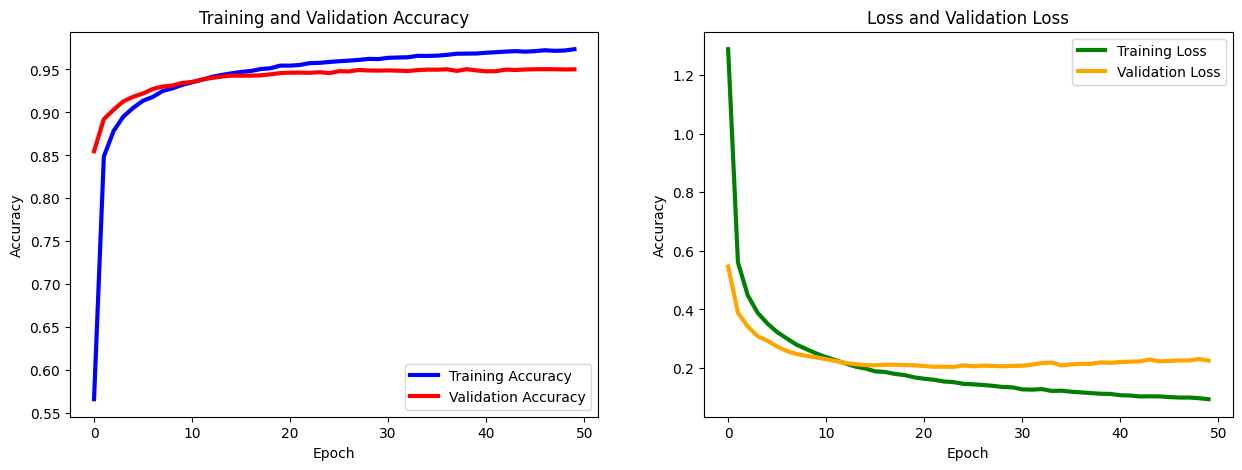

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
num_epochs = model_history.shape[0]
ax[0].plot(np.arange(0, num_epochs), model_history['accuracy'], label='Training Accuracy', lw=3, color='blue')
ax[0].plot(np.arange(0, num_epochs), model_history['val_accuracy'], label='Validation Accuracy', lw=3, color='red')
ax[1].plot(np.arange(0, num_epochs), model_history['loss'], label='Training Loss', lw=3, color='green')
ax[1].plot(np.arange(0, num_epochs), model_history['val_loss'], label='Validation Loss', lw=3, color='orange')
ax[0].set_title('Training and Validation Accuracy')
ax[1].set_title('Loss and Validation Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

A continuación, evaluaremos los datos de set con el modelo generado y visualizaremos los valores de precisión y pérdida obtenidas.

In [9]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Loss: 0.2446
Accuracy: 0.9492


# Conclusión <a class="anchor" id="conclusion"></a>
Como podemos observar, existe una gran evolución en la precisión de la red neuronal según van avanzando las épocas, además de observar una disminución de la función de pérdida de forma considerable hasta conseguir una estabilización a partir de las 10 épocas.

Adicionalmente, el modelo es capaz de predecir correctamente el 94,92% de los resultados del dataset de test por lo que podemos considerar que se trata de un modelo bastante preciso.

En este caso, podemos observar como la validación de la precisión del modelo está por debajo de la precisión obtenida durante el entrenamiento, de igual manera, la pérdida de validación es mayor que la pérdida de entrenamiento. Esto se debe a que el modelo se ha ajustado mejor a los datos tras utilizar las capas `Dropout`.